In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from statsmodels.datasets import sunspots
from statsmodels.tsa.deterministic import Fourier
from statsmodels.tsa.deterministic import Seasonality
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression
from learntools.time_series.style import * 

In [3]:
data = sunspots.load_pandas().data

In [4]:
data

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


# Solar data has an 11-year cycle

<Axes: xlabel='YEAR'>

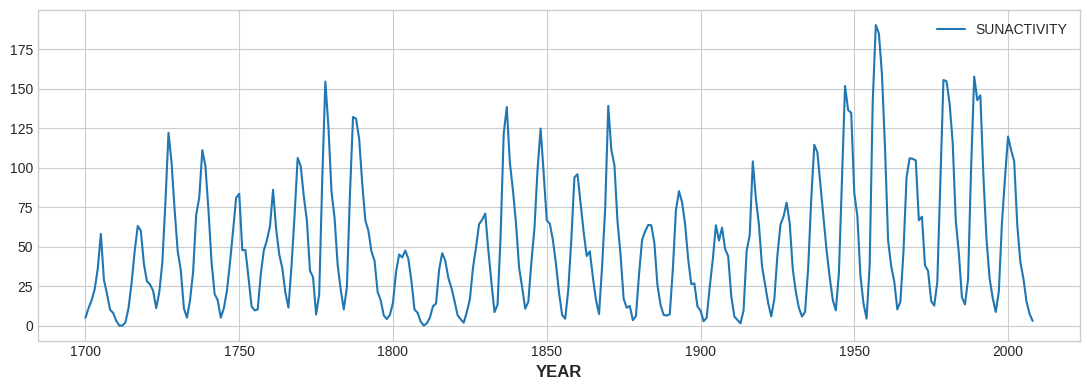

In [5]:
data.plot(x='YEAR',y='SUNACTIVITY')

In [6]:
fourier_gen = Fourier(period=11, order=1)
fourier_gen.in_sample(data.index)

,"sin(1,11)","cos(1,11)"
0,0.000000e+00,1.000000
1,5.406408e-01,0.841254
2,9.096320e-01,0.415415
3,9.898214e-01,-0.142315
4,7.557496e-01,-0.654861
...,...,...
304,-7.557496e-01,-0.654861
305,-9.898214e-01,-0.142315
306,-9.096320e-01,0.415415
307,-5.406408e-01,0.841254


In [7]:
data.index

RangeIndex(start=0, stop=309, step=1)

In [8]:

seas_gen = Seasonality(11)
seas_gen.in_sample(data.index)

,"s(1,11)","s(2,11)","s(3,11)","s(4,11)","s(5,11)","s(6,11)","s(7,11)","s(8,11)","s(9,11)","s(10,11)","s(11,11)"
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
dp = DeterministicProcess(
    index=data.index,
    constant=False,
    order=1,
    period=33,
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier_gen],  # annual seasonality (fourier)
    drop=True,
)
X = dp.in_sample() 

In [10]:
 y=data['SUNACTIVITY']

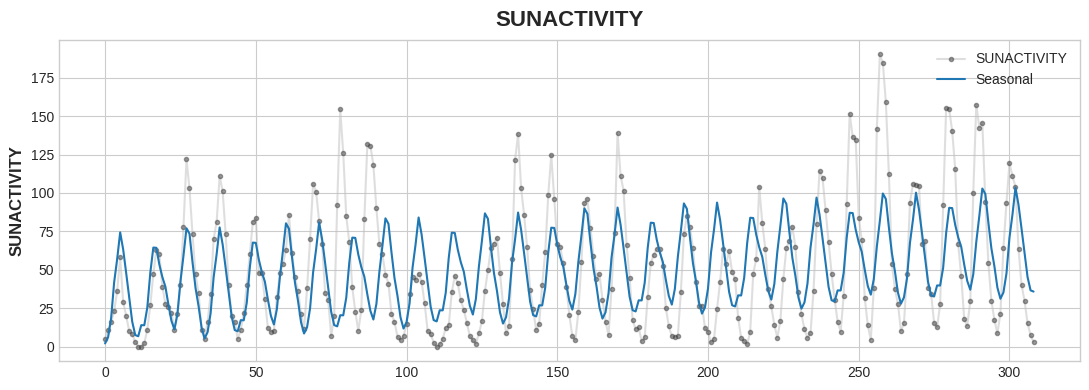

In [11]:
model = LinearRegression().fit(X,y)
y_pred = pd.Series(
    model.predict(X),
    index=X.index,
    name='Fitted',
)

y_pred = pd.Series(model.predict(X), index=X.index)
ax = y.plot(**plot_params, alpha=0.5, title="SUNACTIVITY", ylabel="SUNACTIVITY")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax.legend();